In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import missingno as msno
import plotly.express as px 
import scipy.stats as stats

# 한글 글꼴 설정
mpl.rc('font', family='Malgun Gothic')

In [247]:
df1 = pd.read_csv('05_Data.csv', encoding='cp949')
df1

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1
...,...,...,...,...,...,...,...,...
14995,14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3
14996,14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7
14997,14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16
14998,14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6


# Mission1. 
1. df1 데이터의 구조와 타입을 확인
2. '날짜' 데이터 항목을 날짜 타입으로 변환하여 'datetime'이름의 변수로 선언
3. 'datetime' 변수로 부터 '연도' / '월' / '요일' 항목을 추출해 변수로 선언
4. '카테고리' 항목 중 '세탁세제'의 출고수량이 높은 100개 데이터를 추출하여, result1.xlsx 저장하시오
5. '카테고리'별 '출고수량'과 '입고수량'의 평균/합/표준편차를 요약 계산하시오
6. '입고수량' 항목의 분포를 시각화 하고, 정규분포를 따른지 가설검정을 수행하시오
7. '출고수량'이 상위 25%인 데이터를 'A'로 미만인 데이터를 'B' 바꾸어 '구분'이라는 이름의 새로운 항목으로 선언하시오
8. '카테고리'에서 '세탁세제'와 '헤어케어'제품의 '입고수량' 평균의 차이가 있는지 확인
    - '세탁세제'와 '헤어케어'제품을 뽑아 '입고수량'의 평균을 barchart로 시각화
    - 두 집단 간 평균의 차이가 있는지 가설 검정을 수행
9. 5월 대비 8월에 출고수량의 증감율을 각 카테고리 별로 계산

In [248]:
# 1. df1 데이터의 구조와 타입을 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15000 non-null  int64  
 1   날짜          15000 non-null  object 
 2   상품명         15000 non-null  object 
 3   바코드         14992 non-null  float64
 4   발주가능상태      15000 non-null  object 
 5   입고수량        15000 non-null  int64  
 6   카테고리        15000 non-null  object 
 7   출고수량        15000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 937.6+ KB


In [249]:
# 2. '날짜' 데이터 항목을 날짜 타입으로 변환하여 'datetime'이름의 변수로 선언
df1['datetime'] = pd.to_datetime(df1['날짜'])
df1.head()

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,datetime
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16


In [250]:
# 3. 'datetime' 변수로 부터 '연도' / '월' / '요일' 항목을 추출해 변수로 선언
df1['연도'] = df1['datetime'].dt.year
df1['월'] = df1['datetime'].dt.month
df1['요일'] = df1['datetime'].dt.day_name()

In [251]:
df1.head()

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,datetime,연도,월,요일
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,Thursday
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,Thursday
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16,2019,5,Thursday
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16,2019,5,Thursday
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16,2019,5,Thursday


In [252]:
# 4. '카테고리' 항목 중 '세탁세제'의 출고수량이 높은 100개 데이터를 추출하여, result1.xlsx 저장하시오
cond1 = (df1['카테고리'] == '세탁세제')
df1.loc[cond1].sort_values(by='출고수량', ascending=False).head(100).to_excel('result1.xlsx')

In [253]:
# 5. '카테고리'별 '출고수량'과 '입고수량'의 평균/합/표준편차를 요약 계산하시오
df1.pivot_table(index='카테고리', values=['출고수량','입고수량'], aggfunc=['mean','sum','std'])

mean                sum                std           
             입고수량       출고수량    입고수량   출고수량        입고수량       출고수량
카테고리                                                              
F&B     48.363198   5.566474   50201   5778  232.547487   9.552419
ST       5.566397   0.398961    9641    691   27.615995   0.958202
기타      34.163399   4.058824    5227    621  143.768201   4.068873
덴탈케어    67.688283   5.072231  210849  15800  384.285684  12.516178
매입브랜드   16.638655   1.176471    3960    280   55.213163   1.551627
세탁세제    60.092145  11.083236  256293  47270  387.954626  28.648340
주방세제   104.768286  10.567583  179049  18060  473.236422  19.751878
헤어케어    57.072000   7.119273  156948  19578  310.943569  18.570081

In [254]:
# 6. '입고수량' 항목의 분포를 시각화 하고, 정규분포를 따른지 가설검정을 수행하시오

In [255]:
%matplotlib inline

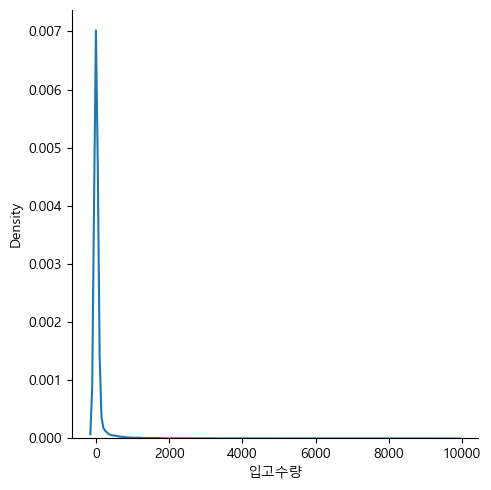

In [256]:
import seaborn as sns
sns.displot(data=df1, x='입고수량', kind='kde')

In [257]:
# 6-1. '입고수량' 정규분포를 따른지 가설검정을 수행하시오
# 귀무 가설 : 해당 데이터의 분포는 정규분포를 따른다. (정규분포와 차이가 없다.)
# 대립 가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다. (정규분포와 차이가 있다.)
import scipy.stats as stats

In [258]:
stats.normaltest(df1['입고수량'])
# P.value(귀무가설이 참일 확률) < 0.05(5%)
# 대립가설 참 / 해당 데이터의 분포는 정규분포를 따르지 않는다.

NormaltestResult(statistic=27348.379111004586, pvalue=0.0)

In [259]:
# 7. '출고수량'이 상위 25%인 데이터를 'A'로 미만인 데이터를 'B' 바꾸어 '구분'이라는 이름의 새로운 항목으로 선언하시오

In [260]:
df1['출고수량'].describe()

count    15000.000000
mean         7.205200
std         19.819656
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        308.000000
Name: 출고수량, dtype: float64

In [261]:
q3 = df1['출고수량'].quantile(.75)  # quantile 특정 백분위수에 위치한 값을 확인
q3

4.0

In [262]:
def func1(data) :
    if data >= q3:
        return 'A'
    else :
        return 'B'

In [263]:
df1['구분'] = df1['출고수량'].apply(func1)
df1['구분'].value_counts()

B    10907
A     4093
Name: 구분, dtype: int64

In [264]:
# 8. '카테고리'에서 '세탁세제'와 '헤어케어'제품의 '입고수량' 평균의 차이가 있는지 확인
#     평균의 차이가 있는지 확인 하고자 한다.
#     - '세탁세제'와 '헤어케어'제품을 뽑아 '입고수량'의 평균을 barchart로 시각화
#     - 두 집단 간 평균의 차이가 있는지 가설 검정을 수행

<AxesSubplot:xlabel='카테고리', ylabel='입고수량'>

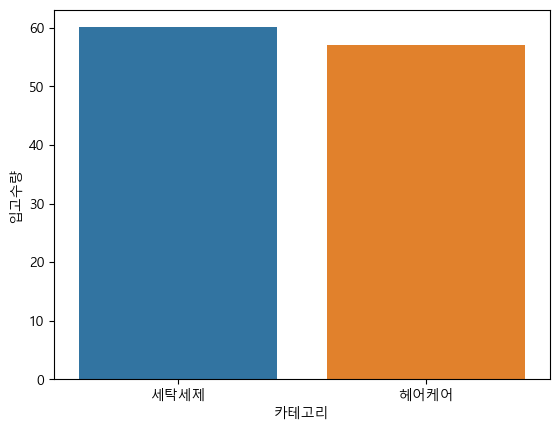

In [265]:
cond1 = df1['카테고리'].isin(['세탁세제','헤어케어'])
df2 = df1.loc[cond1]
sns.barplot(data=df2, x='카테고리', y='입고수량', ci=None)

In [266]:
# 8-2 두 집단(x-범주형) 간 입고수량(y-연속형) 평균의 차이가 있는지 가설 검정을 수행
# 귀무 가설 : 두 집단의 평균의 차이가 없다.
# 대립 가설 : 두 집단의 평균의 차이가 있다.

# 8-2-1. 입고수량이 정규분포를 따르는가?
# 귀무 가설 : 해당 데이터의 분포는 정규분포를 따른다.
# 대립 가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다.

stats.normaltest(df1['입고수량'])
# p.value < 0.05 / 대립가설 참 / 비정규

NormaltestResult(statistic=27348.379111004586, pvalue=0.0)

In [267]:
cond1 = (df2['카테고리'] == '헤어케어')
cond2 = (df2['카테고리'] == '세탁세제')
df2_1 = df2.loc[cond1]
df2_2 = df2.loc[cond2]
stats.ranksums(df2_1['입고수량'], df2_2['입고수량'])

# p.value > 0.05 / 귀무가설 참 / 두 집단의 평균의 차이가 없다.

RanksumsResult(statistic=-1.0908051269344679, pvalue=0.27535864003025057)

In [268]:
# 9. 5월 대비 8월에 출고수량의 증감율을 각 카테고리 별로 계산
p1 = df1.pivot_table(index='카테고리', values='출고수량', 
                columns='월', aggfunc='mean').reset_index()


In [269]:
p1['증감액'] = (p1[6] - p1[5])/p1[5]
p1['증감액']

0    0.014762
1    0.684211
2   -0.111477
3    0.146524
4   -0.074074
5   -0.105897
6    0.385792
7    0.098334
Name: 증감액, dtype: float64

# 지도 학습

In [270]:
df1 = pd.read_csv('06_Data.csv', encoding='cp949')
df1

,Unnamed: 0,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,...,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim,Target
0,0,842302,M,17.99,122.80,1001.0,10.38,0.12,0.27760,0.30010,...,8.589,153.40,0.9053,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,1.0
1,1,842517,M,20.57,132.90,1326.0,17.77,0.08,0.07864,0.08690,...,3.398,74.08,0.7339,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,0.0
2,2,84300903,M,19.69,130.00,1203.0,21.25,0.11,0.15990,0.19740,...,4.585,94.03,0.7869,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,1.0
3,3,84348301,M,11.42,77.58,386.1,20.38,0.14,0.28390,0.24140,...,3.445,27.23,1.1560,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,1.0
4,4,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.13280,0.19800,...,5.438,94.44,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,926424,M,21.56,142.00,1479.0,22.39,0.11,0.11590,0.24390,...,7.673,158.70,1.2560,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042,1.0
565,565,926682,M,20.13,131.20,1261.0,28.25,0.10,0.10340,0.14400,...,5.203,99.04,2.4630,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025,1.0
566,566,926954,M,16.60,108.30,858.1,28.08,0.08,0.10230,0.09251,...,3.425,48.55,1.0750,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039,1.0
567,567,927241,M,20.60,140.10,1265.0,29.33,0.12,0.27700,0.35140,...,5.772,86.22,1.5950,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062,1.0


In [271]:
# 1. 데이터 전처리 (DDA~CDA) : 파생 변수 / 변수 선택 / 이상치 처리 / 병합 / ...
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   Image ID             569 non-null    int64  
 2   Diagnosis            569 non-null    object 
 3   Mean Radius          569 non-null    float64
 4   Mean Perimeter       569 non-null    float64
 5   Mean Area            569 non-null    float64
 6   Mean Texture         569 non-null    float64
 7   Mean Smoothness      569 non-null    float64
 8   Mean Compactness     569 non-null    float64
 9   Mean Concavity       569 non-null    float64
 10  Mean Concave Points  569 non-null    float64
 11  Mean Symmetry        569 non-null    float64
 12  Mean Fractal Dim     569 non-null    float64
 13  Max Radius           569 non-null    float64
 14  Max Perimeter        569 non-null    float64
 15  Max Area             569 non-null    flo

In [272]:
df1.columns     # 데이터 내 모든 항목을 표현

Index(['Unnamed: 0', 'Image ID', 'Diagnosis', 'Mean Radius', 'Mean Perimeter',
       'Mean Area', 'Mean Texture', 'Mean Smoothness', 'Mean Compactness',
       'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry',
       'Mean Fractal Dim', 'Max Radius', 'Max Perimeter', 'Max Area',
       'Max Texture', 'Max Smoothness', 'Max Compactness', 'Max Concavity',
       'Max Concave Points', 'Max Symmetry', 'Max Fractal Dim', 'SE Radius',
       'SE Perimeter', 'SE Area', 'SE Texture', 'SE Smoothness',
       'SE Compactness', 'SE Concavity', 'SE Concave Points', 'SE Symmetry',
       'SE Fractal Dim', 'Target'],
      dtype='object')

In [273]:
df2 = df1[['Diagnosis', 'Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Texture']]

In [274]:
# 2. 목표변수(Y)과 설명변수(X) 설정 (목표변수 - 예측/분류)
Y = df2['Diagnosis']
X = df2[['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Texture']]

In [275]:
# 3. 학습데이터(Train Set)와 검증데이터(Test Set, 일반화 성능 측정) 분할
# sklearn : 정형데이터(Excel, 차트)의 기계학습 관련 함수들의 집합체(특성공학 + 알고리즘)
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)    # 8(train) : 2(test) 비율

In [277]:
# 4. 학습 수행
from sklearn.tree import DecisionTreeClassifier     # 의사결정나무 모델 알고리즘

In [278]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train) # fit : Train Set 학습데이터를 알고리즘이 학습

DecisionTreeClassifier()

In [279]:
# 5. 평가 수행 (Model -> 기존의 Train, Test -> 예측값 -> 실제값과 예측값 비교)
Y_train_pred = model.predict(X_train)   # 학습데이터의 예측값 계산
Y_test_pred = model.predict(X_test)     # 검증데이터의 예측값 계산

In [280]:
# 예측값과 실제값을 비교해 평가
from sklearn.metrics import accuracy_score

In [281]:
# 학습 능력 평가
accuracy_score(Y_train, Y_train_pred)

1.0

In [282]:
# 일반화 능력 평가
accuracy_score(Y_test, Y_test_pred)

0.9020979020979021

In [283]:
# 6. 새로운 데이터를 넣어 예측/분류
x1 = int(input('Radius값을 입력하시오 : '))
x2 = int(input('Perimeter값을 입력하시오 : '))
x3 = int(input('Area값을 입력하시오 : '))
x4 = int(input('Texture값을 입력하시오 : '))

In [284]:
input_data = pd.DataFrame([[x1,x2,x3,x4]])
model.predict(input_data)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['B'], dtype=object)

# 분류에서 평가

In [285]:
# sklearn.metrics : 평가지표들을 확인
from sklearn.metrics import classification_report

In [286]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       271
           M       1.00      1.00      1.00       155

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [287]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           B       0.91      0.93      0.92        86
           M       0.89      0.86      0.88        57

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.90       143
weighted avg       0.90      0.90      0.90       143



# Mission7
- 10_Data.csv파일을 이용해 아래와 같은 분석을 하고자한다. 아래의 문제를 수행하시오
1. 데이터를 df1으로 불러와 구조와 타입을 확인하고, 결측값의 빈도수를 확인하시오
2. '작업장코드'별 항목과 빈도수를 확인하고, 빈도수가 가장 높은 항목을 추출하여 df1_top으로 선언,
df1_top데이터의 실링압력이 높은 상위 100개 데이터를 추출해 result2.xlsx
3. df1데이터에서 '충전실온도'가 상위 10%해당하는 데이터를 추출하여, df1_temp_top선언하고,
해당 데이터의 '쿠킹온도'의 평균과 중앙값의 차이를 계산하시오.
4. 공정 조업조건 간 상관관계를 확인하고자 한다. '충전실온도'와 나머지 숫자 변수들('실링온도', '쿠킹스팀압력', '실링압력', '생산시간')간의 산점도를 시각화
5. df1 데이터에서 결측값(Missing Value)을 제거하여 df1_clean으로 선언
6. df1_clean 데이터에서 '충전실온도'와 '생산시간'간의 상관성이 있는지 가설검정을 수행
7. '실링압력'이 80%이상인 데이터를 'A' 미만인 데이를 'B'로 만들어 '압력분류'로 선언하고, '쿠킹스팀압력'이 50%이상인 데이터를 'T' 미만인 데이터를 'F'로 만들어 '스팀분류'로 선언
8. '압력분류'와 '스팀분류'간의 연관성이 있는지 가설검정을 수행
9. df1_clean데이터에서 '생산시간'이 80초 이상은 1, 미만은 0으로 만들어 'Target' 변수로 선언, 'Target'값을 분류하는 Modeling 수행
    - X : 충전실온도 / 실링온도 / 쿠킹온도 / 실링압력
    - Y : Target
    - 학습데이터 검증데이터 분할 후 학습 수행 / 알고리즘 DecisionTreeClassifier
    - 학습능력평가 / 검증능력평가

In [328]:
# 1. 데이터를 df1으로 불러와 구조와 타입을 확인하고, 결측값의 빈도수를 확인하시오
df1 = pd.read_csv('10_Data.csv', encoding='cp949')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24069 entries, 0 to 24068
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      24069 non-null  int64  
 1   생산라인코드  24069 non-null  object 
 2   생산라인명   24069 non-null  object 
 3   생산일자    24069 non-null  object 
 4   품목코드    24031 non-null  object 
 5   품목명     24012 non-null  object 
 6   작업장코드   24069 non-null  object 
 7   충전실온도   24069 non-null  float64
 8   실링온도    24041 non-null  float64
 9   쿠킹온도    24041 non-null  float64
 10  쿠킹스팀압력  24069 non-null  float64
 11  실링압력    24069 non-null  float64
 12  생산시간    22991 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.4+ MB


In [329]:
df1.isnull().sum()

순번           0
생산라인코드       0
생산라인명        0
생산일자         0
품목코드        38
품목명         57
작업장코드        0
충전실온도        0
실링온도        28
쿠킹온도        28
쿠킹스팀압력       0
실링압력         0
생산시간      1078
dtype: int64

In [330]:
import missingno as msno

<AxesSubplot:>

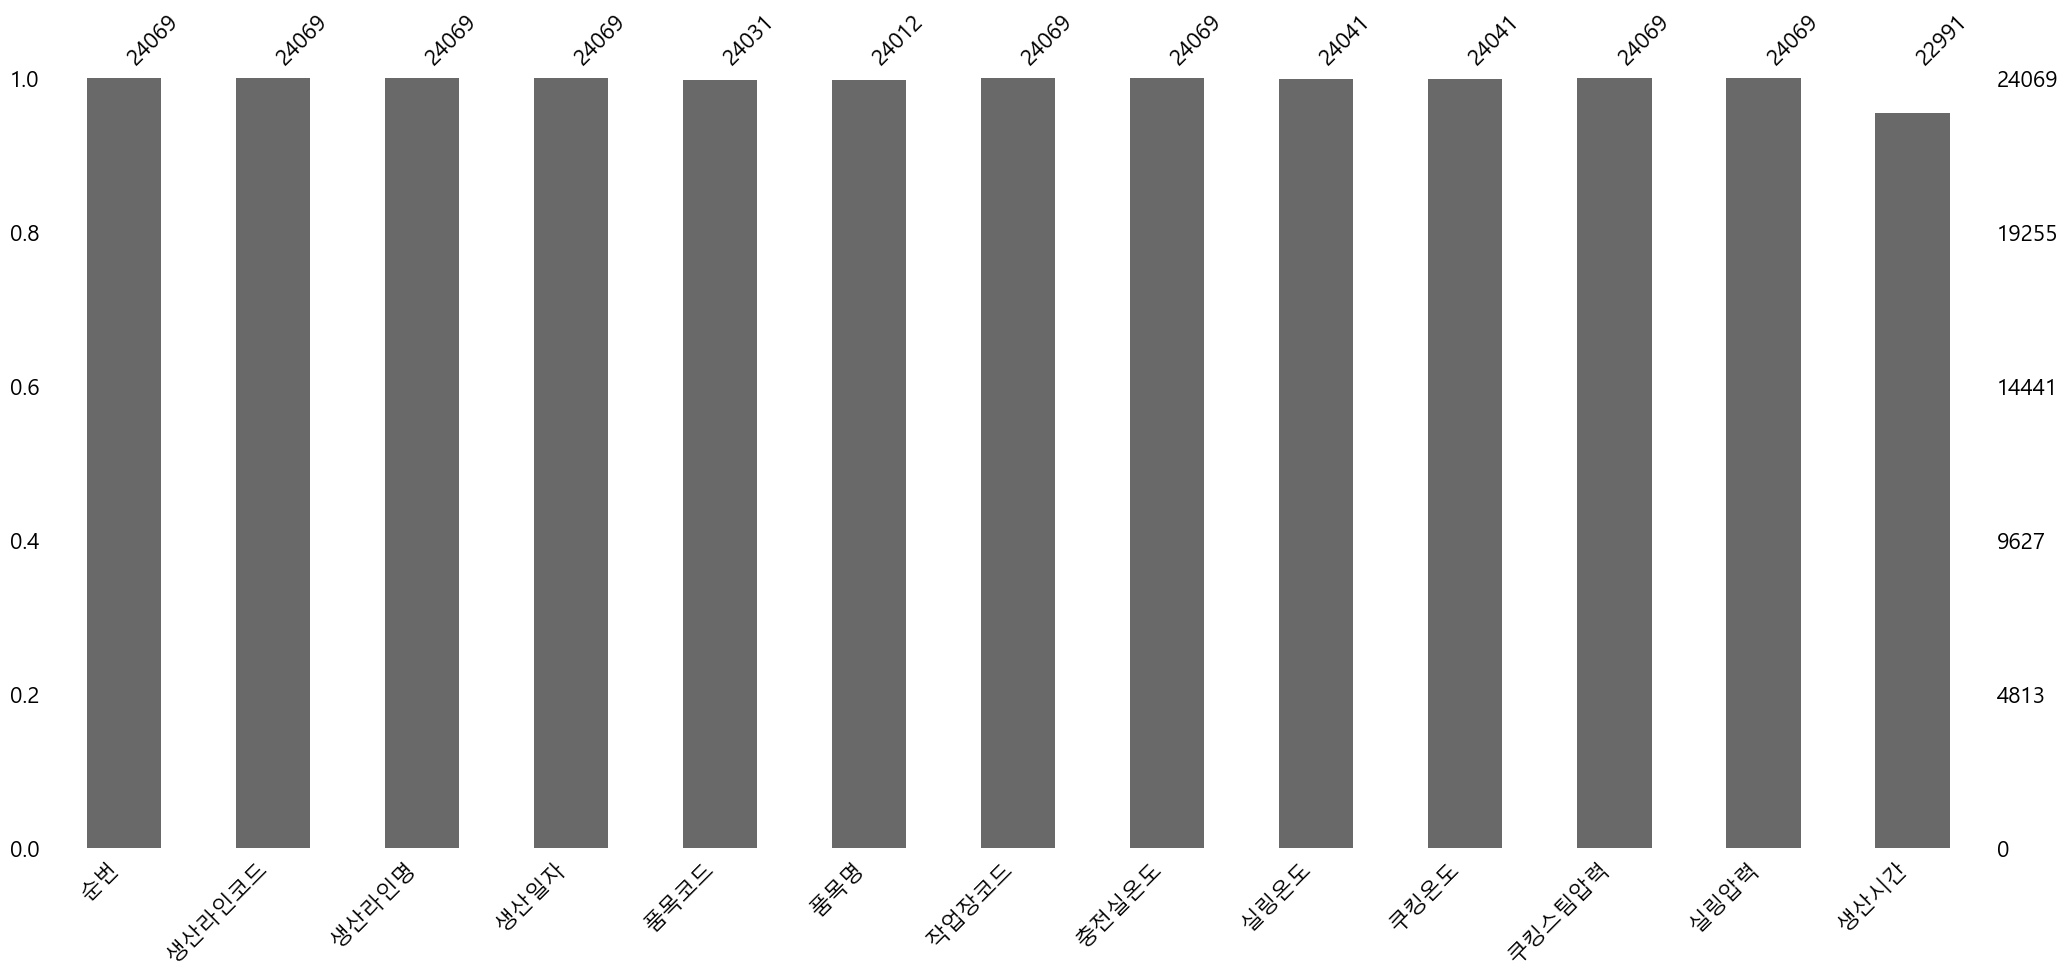

In [331]:
msno.bar(df1)   # 실측값의 빈도수와 비율을 막대그래프로 표현

<AxesSubplot:>

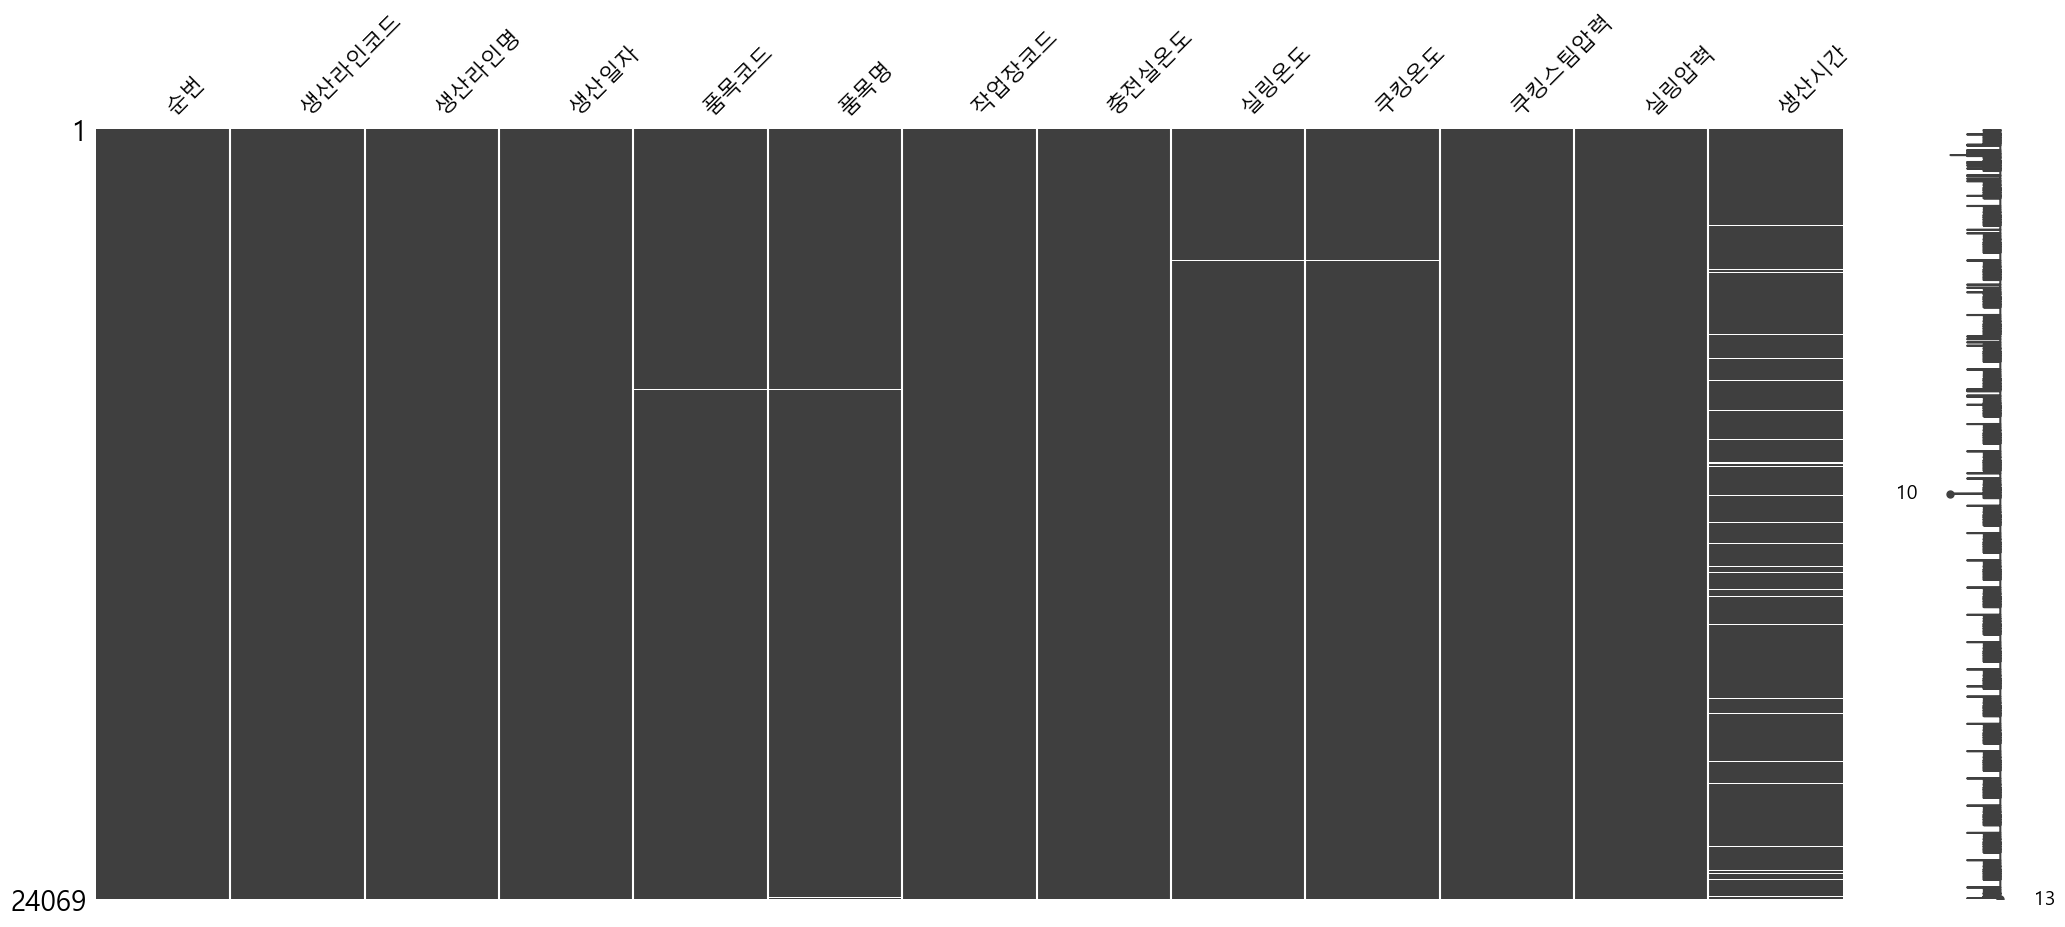

In [332]:
msno.matrix(df1)    # 결측값의 위치를 하얀 실선으로 표현

In [333]:
# 2. '작업장코드'별 항목과 빈도수를 확인하고, 빈도수가 가장 높은 항목을 추출하여 df1_top으로 선언,
# df1_top데이터의 실링압력이 높은 상위 100개 데이터를 추출해 result2.xlsx
cond1 = (df1['작업장코드'] == df1['작업장코드'].value_counts().index[0])
df1_top = df1.loc[cond1]
df1_top.sort_values(by='실링압력', ascending=False).head(100).to_excel('result2.xlsx')

In [334]:
# 3. df1데이터에서 '충전실온도'가 상위 10%해당하는 데이터를 추출하여, df1_temp_top선언하고,
# 해당 데이터의 '쿠킹온도'의 평균과 중앙값의 차이를 계산하시오.
q_10 = df1['충전실온도'].quantile(.9)
cond1 = (df1['충전실온도'] >= q_10)
df1_temp_top = df1.loc[cond1]

In [335]:
df1_temp_top['쿠킹온도'].mean() - df1_temp_top['쿠킹온도'].median()

0.14462280002086914

In [336]:
# 4. 공정 조업조건 간 상관관계를 확인하고자 한다. '충전실온도'와 나머지 숫자 변수들('실링온도', '쿠킹스팀압력', '실링압력', '생산시간')간의 산점도를 시각화
import seaborn as sns

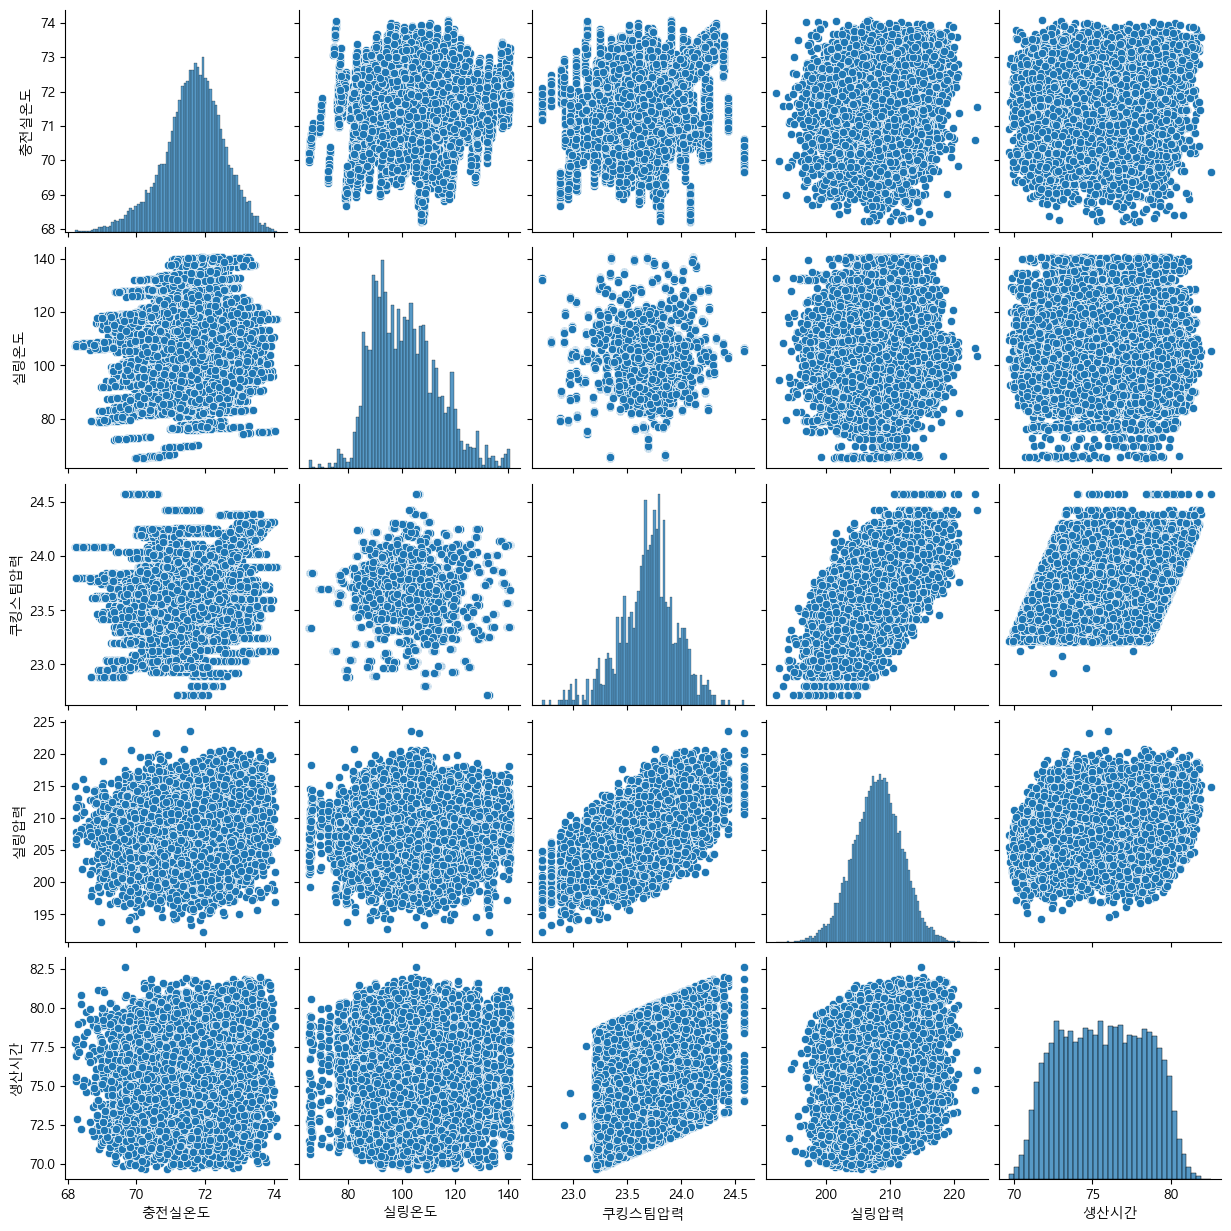

In [337]:
sns.pairplot(data=df1[['충전실온도','실링온도', '쿠킹스팀압력', '실링압력', '생산시간']])

In [338]:
# 5. df1 데이터에서 결측값(Missing Value)을 제거하여 df1_clean으로 선언
df1_clean = df1.dropna()

In [339]:
df1_clean.head()

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55
3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81
4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40


In [340]:
# 6. df1_clean 데이터에서 
# '충전실온도'(연속형)와 '생산시간'(연속형)간의 상관성이 있는지 가설검정을 수행
import scipy.stats as stats

In [341]:
# 6-1 정규성 확인
# 귀무 : 해당데이터의 분포는 정규분포를 따른다 / 대립 : 정규 X
stats.normaltest(df1_clean['충전실온도'])   # P.value < 0.05 / 정규 X

NormaltestResult(statistic=607.0743478497803, pvalue=1.4978913468534285e-132)

In [342]:
stats.normaltest(df1_clean['생산시간'])     # P.value < 0.05 / 정규 X

NormaltestResult(statistic=6755.863140227274, pvalue=0.0)

In [343]:
# 귀무가설 : 두 연속형 숫자데이터는 서로 상관성이 없다.
# 대립가설 : 두 연속형 숫자데이터는 서로 상관성이 있다.

stats.spearmanr(df1_clean['충전실온도'], df1_clean['생산시간'])
# P.value < 0.05 / 대립가설 참 / 두 데이터간의 상관성은 존재 한다.
# correlation 8%

SpearmanrResult(correlation=0.08539153885299036, pvalue=2.425050913364176e-38)

In [358]:
# 7. '실링압력'이 80%이상인 데이터를 'A' 미만인 데이를 'B'로 만들어 '압력분류'로 선언하고, 

In [359]:
# q_8 = df1_clean['실링압력'].quantile(.8)  # quantile 특정 백분위수에 위치한 값을 확인
# q_8

# def func1(data) :
#     if data >= q_8:
#         return 'A'
#     else :
#         return 'B'

# df1_clean['압력분류'] = df1_clean['실링압력'].apply(func1)
# df1_clean['압력분류'].value_counts()

In [360]:
cond1 = (df1['실링압력'] >= df1['실링압력'].quantile(0.8))
df1.loc[cond1, '압력분류'] = 'A'
df1.loc[~cond1, '압력분류'] = 'B'

In [361]:
# '쿠킹스팀압력'이 50%이상인 데이터를 'T' 미만인 데이터를 'F'로 만들어 '스팀분류'로 선언

In [362]:
# q_5 = df1_clean['쿠킹스팀압력'].quantile(.5)  # quantile 특정 백분위수에 위치한 값을 확인
# q_5

# def func1(data) :
#     if data >= q_5:
#         return 'T'
#     else :
#         return 'F'

# df1_clean['스팀분류'] = df1_clean['쿠킹스팀압력'].apply(func1)
# df1_clean['스팀분류'].value_counts()

In [364]:
cond2 = (df1['쿠킹스팀압력'] >= df1['쿠킹스팀압력'].median())
df1.loc[cond2, '스팀분류'] = 'T'
df1.loc[~cond2, '스팀분류'] = 'F'

In [365]:
# 8. '압력분류'(범주형)와 '스팀분류'(범주형)간의 연관성이 있는지 가설검정을 수행
pd.crosstab(df1['압력분류'], df1['스팀분류'])

스팀분류,F,T
압력분류,,
A,872,3944
B,11136,8117


In [366]:
df_contingency = pd.crosstab(df1['압력분류'], df1['스팀분류'])
df_contingency

스팀분류,F,T
압력분류,,
A,872,3944
B,11136,8117


In [368]:
# 귀무가설 : 압력분류와 스팀분류 항목은 서로 독립이다. (연관성이 없다)
# 대립가설 : 압력분류와 스팀분류 항목은 서로 독립이 아니다. (연관성이 있다)
stats.chi2_contingency(df_contingency)
# 통계량 / P.value / 자유도 / 기댓값
# P.value < 0.05 / 대립가설 참 /

(2431.2536760834837,
 0.0,
 1,
 array([[2402.6975778, 2413.3024222],
        [9605.3024222, 9647.6975778]]))

In [313]:
# 9. df1_clean데이터에서 '생산시간'이 80초 이상은 1, 미만은 0으로 만들어 'Target' 변수로 선언, 'Target'값을 분류하는 Modeling 수행
#     - X : 충전실온도 / 실링온도 / 쿠킹온도 / 실링압력
#     - Y : Target
#     - 학습데이터 검증데이터 분할 후 학습 수행 / 알고리즘 DecisionTreeClassifier
#     - 학습능력평가 / 검증능력평가

In [314]:
df1_clean['생산시간']

0        70.37
1        70.83
2        73.55
3        74.81
4        73.40
         ...  
24059    72.49
24062    76.63
24063    81.00
24067    72.12
24068    76.03
Name: 생산시간, Length: 22909, dtype: float64

In [315]:
def func1(data) :
    if data >= 80:
        return 1
    else :
        return 0

In [316]:
df1_clean['Target'] = df1_clean['생산시간'].apply(func1)
df1_clean['Target'].value_counts()

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_21164\1180904524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['Target'] = df1_clean['생산시간'].apply(func1)


0    21955
1      954
Name: Target, dtype: int64

In [317]:
from sklearn.metrics import classification_report

In [318]:
df1_clean.columns     # 데이터 내 모든 항목을 표현

Index(['순번', '생산라인코드', '생산라인명', '생산일자', '품목코드', '품목명', '작업장코드', '충전실온도',
       '실링온도', '쿠킹온도', '쿠킹스팀압력', '실링압력', '생산시간', '압력분류', '스팀분류', 'Target'],
      dtype='object')

In [319]:
df2 = df1_clean[['Target', '충전실온도', '실링온도', '쿠킹온도', '실링압력']]

In [320]:
# 목표변수(Y)과 설명변수(X) 설정 (목표변수 - 예측/분류)
Y = df2['Target']
X = df1_clean[['충전실온도', '실링온도', '쿠킹온도', '실링압력']]

In [321]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)    # 8(train) : 2(test) 비율

In [322]:
# 학습 수행
from sklearn.tree import DecisionTreeClassifier     # 의사결정나무 모델 알고리즘

In [323]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train) # fit : Train Set 학습데이터를 알고리즘이 학습

DecisionTreeClassifier()

In [324]:
# 평가 수행 (Model -> 기존의 Train, Test -> 예측값 -> 실제값과 예측값 비교)
Y_train_pred = model.predict(X_train)   # 학습데이터의 예측값 계산
Y_test_pred = model.predict(X_test)     # 검증데이터의 예측값 계산

In [325]:
# 일반화 능력 평가
accuracy_score(Y_test, Y_test_pred)

0.9202164804469274

In [326]:
# 학습 능력 평가
accuracy_score(Y_train, Y_train_pred)

1.0

In [327]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5476
           1       0.10      0.11      0.11       252

    accuracy                           0.92      5728
   macro avg       0.53      0.53      0.53      5728
weighted avg       0.92      0.92      0.92      5728

